# PCA & TSNE

**Important Parameters**

**Relevant Information**

## Important Parameters

Let's work with Iris Dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

## Data

In [4]:
#Load the dataset 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df.drop(columns = ["sepal_width"], inplace = True)
df.head()

,sepal_length,petal_length,petal_width,target
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [6]:
for c in ["sepal_length", "petal_length", "petal_width"]:
    # Standarize 
    df[c] = (df[c] - df[c].mean())/df[c].std()

df

,sepal_length,petal_length,petal_width,target
0,-0.897674,-1.335752,-1.311052,0
1,-1.139200,-1.335752,-1.311052,0
2,-1.380727,-1.392399,-1.311052,0
3,-1.501490,-1.279104,-1.311052,0
4,-1.018437,-1.335752,-1.311052,0
...,...,...,...,...
145,1.034539,0.816859,1.443994,2
146,0.551486,0.703564,0.919223,2
147,0.793012,0.816859,1.050416,2
148,0.430722,0.930154,1.443994,2


## Visualization

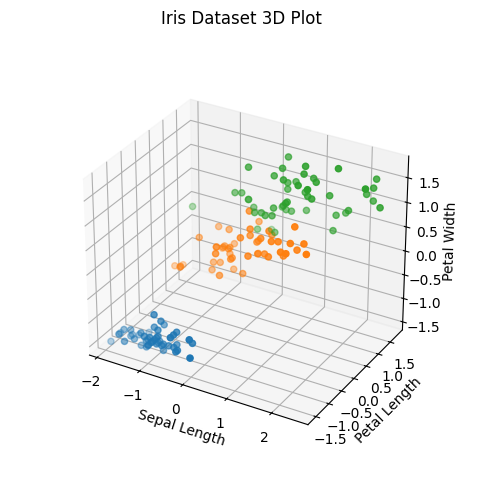

In [44]:
fig = plt.figure(figsize = (8,6), dpi = 100)
ax = fig.add_subplot(projection='3d')

target = [0,1,2]

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for t in target:
    df_loc = df.loc[df.target == t].copy()
    ax.scatter(df_loc.sepal_length, df_loc.petal_length, df_loc.petal_width)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal Width")
ax.set_title("Iris Dataset 3D Plot")
ax.set_box_aspect(aspect=(1, 0.8, 0.8), zoom = 0.8)
plt.savefig("img/3d_iris.png", dpi = 300, bbox_inches='tight')
plt.show()

### PCA

In [45]:
# Fit PCA model 
X = df.drop(columns=["target"])
y = df["target"]

pca = PCA(n_components=2)
pca.fit(X)
df_pca = pca.transform(X)
df_pca = pd.DataFrame(df_pca, columns=["pca_1", "pca_2"])
df_pca["target"] = y 
df_pca

,pca_1,pca_2,target
0,-2.053481,-0.297677,0
1,-2.188649,-0.101387,0
2,-2.357324,0.080480,0
3,-2.357895,0.207470,0
4,-2.121065,-0.199532,0
...,...,...,...
145,1.900326,0.124009,2
146,1.258364,0.212707,2
147,1.536698,0.114022,2
148,1.629418,0.643579,2


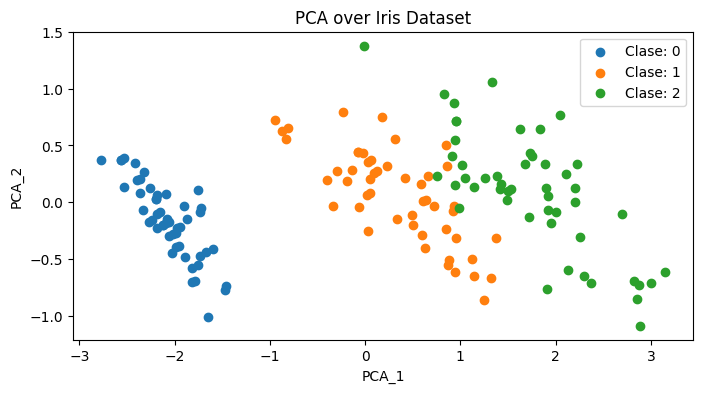

In [46]:
plt.figure(figsize=(8,4))
for c in target:
    df_pca_loc = df_pca.loc[df_pca.target == c].copy()
    plt.scatter(df_pca_loc.pca_1, df_pca_loc.pca_2, label = f'Clase: {c}')
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("PCA over Iris Dataset")
plt.legend()
plt.savefig("img/pca_over_iris.png", dpi = 300, bbox_inches='tight')
plt.show()

### TSNE

In [47]:
# Fit PCA model 
X = df.drop(columns=["target"])
y = df["target"]

tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(df_tsne, columns=["tsne_1", "tsne_2"])
df_tsne["target"] = y 
df_tsne

,tsne_1,tsne_2,target
0,-19.891813,-1.993147,0
1,-20.231684,-3.572967,0
2,-21.190826,-4.703692,0
3,-20.970554,-5.340515,0
4,-20.095320,-2.760555,0
...,...,...,...
145,14.813958,4.246871,2
146,11.725713,3.425884,2
147,13.286745,3.526730,2
148,13.287786,5.166523,2


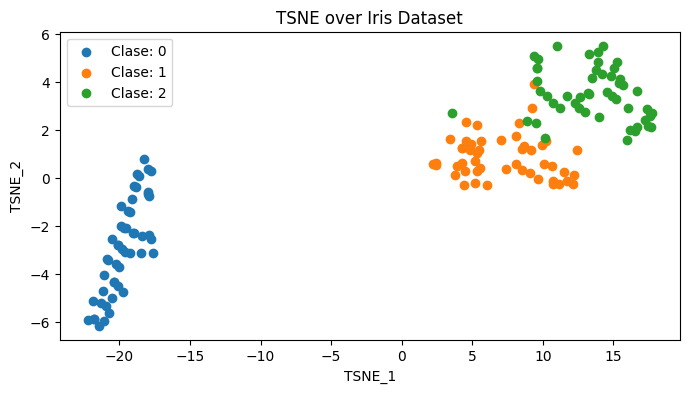

In [48]:
plt.figure(figsize=(8,4))
for c in df_tsne.target.unique():
    df_tsne_loc = df_tsne.loc[df_tsne.target == c].copy()
    plt.scatter(df_tsne_loc.tsne_1, df_tsne_loc.tsne_2, label = f'Clase: {c}')
plt.xlabel("TSNE_1")
plt.ylabel("TSNE_2")
plt.title("TSNE over Iris Dataset")
plt.legend()
plt.savefig("img/tsne_over_iris.png", dpi = 300, bbox_inches='tight')
plt.show()